In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


NamtaDB is a bengali handwritten digits datasets.It has 72045 training images from 0-৯

<div align="center">
<img src="https://drive.google.com/uc?id=1qVt1tN-t5OV_NUPqpJVFukfqhwTSkUDS" width="400">
</div>

<div align="center">
<img src="https://drive.google.com/uc?id=1UqsCvnpHznZKQcqKq4QK66myS9MU2LD2" width="200">
</div>

#Preprocess
Namta db has 5 different folders with training images.2 of the folder has different dimension image than the rest.Those images were resized to match the rest.Then all the images were copied into one folder.The five different csv files were also merged into one

In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
PATH = '/content/gdrive/MyDrive/Namta/'
os.listdir(PATH)

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('training-a.csv')
b_csv = showRawTrainingSamples('training-b.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')
e_csv = showRawTrainingSamples('training-e.csv')

training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-b.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')
training-e.csv
Index(['filename', 'original filename', 'districtid', 'institutionid',
       'gender', 'age', 'datestamp', 'scanid', 'digit',
       'database name original', 'database name'],
      dtype='object')


In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
b_csv = dropColumns(b_csv)
c_csv = dropColumns(c_csv)
d_csv = dropColumns(d_csv)
e_csv = dropColumns(e_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
       filename  digit
0    b00000.png      0
1    b00001.png      2
2    b00002.png      5
3    b00003.png      2
4    b00004.png      5
..          ...    ...
354  b00354.png      5
355  b00355.png      9
356  b00356.png      2
357  b00357.png      1
358  b00358.png      2

[359 rows x 2 columns]
     filename  digit
0  b00000.png      0
1  b00001.png      2
2  b00002.png      5
3  b00003.png      2
4  b00004.png      5
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png     

In [ ]:
total_csv = [a_csv, b_csv,c_csv, d_csv,e_csv]

merged_csv = pd.concat(total_csv)
print(len(merged_csv))

72045


In [ ]:
TRAIN_PATH = '/content/gdrive/MyDrive/Namta/train'
#os.mkdir(TRAIN_PATH)

In [ ]:
def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)

In [ ]:
processImages('training-a')
print('A Done')
processImages('training-b')
print('B Done')
processImages('training-c')
print('C Done')
processImages('training-d')
print('D Done')
processImages('training-e')
print('E Done')

A Done
B Done
C Done
D Done
E Done


In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  72045


- **Input dimension:**
  - Size of image: $28 \times 28 = 784$

- **Output dimension: 10**
  - ০ ,১ ,২ ,৩ ,৪ , ৫ ,৬ ,৭ ,৮ ,৯ 

#Hyperparameter settings 1

In [ ]:
#hyperparameter settings 1
batch_size = 300
num_iters = 5000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Hyperparameter settings 2

In [ ]:
#hyperparameter settings 2
batch_size = 200
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0003

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Hyperparameter settings 3

In [ ]:
#hyperparameter settings 3
batch_size =400
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0006

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Hyperparameter settings 4

In [ ]:
#hyperparameter settings 4
batch_size = 300
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0003

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Hyperparameter settings 5

In [ ]:
#hyperparameter settings 5
batch_size = 450
num_iters = 5500
input_dim = 28*28 # num_features = 784
output_dim = 10
learning_rate = 0.0008
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:


# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
print(split)
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

7204
Train dataloader:145
Test dataloader:17


#Total Training samples is 72045
- 90,10 split ratio
- Train set=64840
- Test  set=7205



In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

In [ ]:
print(num_epochs)

34


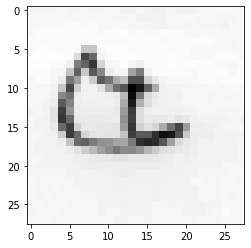

In [ ]:
## Displaying a Namta Image

import matplotlib.pyplot as plt 
import numpy as np

show_img = train_data[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

Label:
1


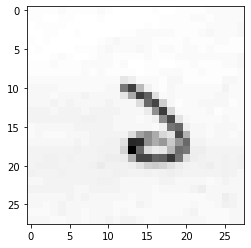

In [ ]:
## Displaying another namta Image with label
 
print("Label:")
print(train_data[2][1])

show_img = train_data[2][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [ ]:
# One Image Size
print(train_data[0][0].size())
print(train_data[0][0].numpy().shape)
# First Image Label
print(train_data[0][1])

torch.Size([1, 28, 28])
(1, 28, 28)
5


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas
        

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)

# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
'''
TRAIN THE MODEL with setting 1
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.0158424377441406. Accuracy: 26.83231538034425
Iteration: 1000. Loss: 2.014610767364502. Accuracy: 26.985008328706275
Iteration: 1500. Loss: 1.976386547088623. Accuracy: 32.468073292615216
Iteration: 2000. Loss: 1.9001635313034058. Accuracy: 33.62021099389228
Iteration: 2500. Loss: 1.9006940126419067. Accuracy: 35.43864519711271
Iteration: 3000. Loss: 1.9132037162780762. Accuracy: 36.36868406440866
Iteration: 3500. Loss: 1.914747953414917. Accuracy: 35.9106052193226
Iteration: 4000. Loss: 1.970603585243225. Accuracy: 37.229317046085505


In [ ]:
'''
TRAIN THE MODEL with setting 2
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8968809843063354. Accuracy: 29.05330372015547
Iteration: 1000. Loss: 1.8711358308792114. Accuracy: 34.71682398667407
Iteration: 1500. Loss: 1.826970100402832. Accuracy: 34.119933370349806
Iteration: 2000. Loss: 1.8469741344451904. Accuracy: 38.7423653525819
Iteration: 2500. Loss: 1.8160319328308105. Accuracy: 40.26929483620211
Iteration: 3000. Loss: 1.8682307004928589. Accuracy: 40.86618545252637
Iteration: 3500. Loss: 1.7383891344070435. Accuracy: 39.727928928373125


In [ ]:

'''
TRAIN THE MODEL setting 3
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9283236265182495. Accuracy: 35.60521932259856
Iteration: 1000. Loss: 1.8054713010787964. Accuracy: 34.49472515269295
Iteration: 1500. Loss: 1.8371092081069946. Accuracy: 39.228206551915605
Iteration: 2000. Loss: 1.7698915004730225. Accuracy: 39.68628539700167
Iteration: 2500. Loss: 1.7411894798278809. Accuracy: 40.56079955580233


In [ ]:
'''
TRAIN THE MODEL with setting 4
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9343632459640503. Accuracy: 28.498056635202666
Iteration: 1000. Loss: 1.790558934211731. Accuracy: 36.27151582454192
Iteration: 1500. Loss: 1.8833093643188477. Accuracy: 37.82620766240977
Iteration: 2000. Loss: 1.8512507677078247. Accuracy: 38.35369239311493
Iteration: 2500. Loss: 1.7824289798736572. Accuracy: 40.01943364797335
Iteration: 3000. Loss: 1.83253014087677. Accuracy: 42.226540810660744


In [ ]:

'''
TRAIN THE MODEL with setting 5
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9149141311645508. Accuracy: 33.7729039422543
Iteration: 1000. Loss: 1.8425124883651733. Accuracy: 36.45197112715158
Iteration: 1500. Loss: 1.8857557773590088. Accuracy: 40.06107717934481
Iteration: 2000. Loss: 1.762655258178711. Accuracy: 40.92171016102166
Iteration: 2500. Loss: 1.8268675804138184. Accuracy: 39.727928928373125
Iteration: 3000. Loss: 1.7530409097671509. Accuracy: 44.017212659633536
Iteration: 3500. Loss: 1.7494487762451172. Accuracy: 41.615769017212656
Iteration: 4000. Loss: 1.7905892133712769. Accuracy: 40.96335369239311
Iteration: 4500. Loss: 1.7490450143814087. Accuracy: 43.600777345918935


[1.9149141311645508, 1.8425124883651733, 1.8857557773590088, 1.762655258178711, 1.8268675804138184, 1.7530409097671509, 1.7494487762451172, 1.7905892133712769, 1.7490450143814087]


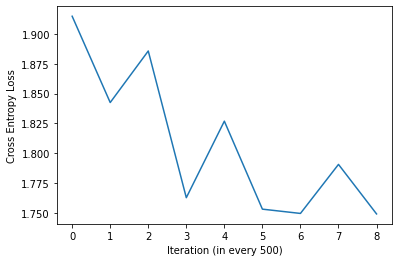

In [ ]:

import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
#settings 1
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Namta_logistic.pkl') 

In [ ]:
#settings 2
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Namta_logistic2.pkl') 

In [ ]:
#settings 3
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Namta_logistic3.pkl') 

In [ ]:
#settings 4
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Namta_logistic4.pkl') 

In [ ]:
#settings 5
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Namta_logistic5.pkl') 

In [ ]:
#settings 1
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Namta_logistic.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
#settings 2
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Namta_logistic2.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
#settings 3
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Namta_logistic3.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
#settings 4
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Namta_logistic4.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
#settings 5
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Namta_logistic5.pkl'))
    print('Trained Model Loaded')

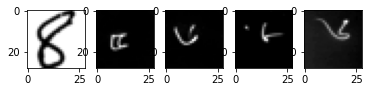

In [ ]:
for images, labels in test_loader:
   break
    
fig, ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [4 0 9 4 6]


###Loss plots for hyperparameter settings 1 and 2:
<div align="center">
<img src="https://drive.google.com/uc?id=1aRtL5FK0g1ViI7T5UfOj7L0y95PCgxBO" width="300">
<img src="https://drive.google.com/uc?id=1tNK2Hzfj3JE2RgdOy3PTieADgqLXRYHM" width="300">
</div>
Loss plots for hyperparameter settings 3 and 4:
<div align="center">
<img src="https://drive.google.com/uc?id=16taCu2ehSoDeBmR4g6O-JmVgbwIIcvAP" width="300">
<img src="https://drive.google.com/uc?id=18urt6SGG-EH889JKH1NkN0ratsd8zIDq" width="300">
</div>
Loss plot for hyperparameter settings 5
<div align="center">
<img src="https://drive.google.com/uc?id=1yetxXmxrweUzn4QUcqmWr6igABSWJXLI" width="300">

</div>

**Result table:-**

| Settings| Batch Size    | Iteration     | Learning Rate |  Optimzer           |  Accuracy(%)|
|:--------:| :----------: | :-----------: | : -----------:|:-----:      |:-----------:|
| 1        |300          | 5000       | 0.0001        |  SGD    |  37.229    |
| 2        | 200         | 4000          | 0.0003        |  ADAM    |  39.727    |
| 3        |  400       |   3000   |    0.0006 |  ADAM   |    40.56   |
| 4        |  300       |   4000  |  0.0003  |  ADAM   |  42.226    |
| 5        |   450       |    5500    | 0.0008       |  ADAM    |   43.60    |

#Hyperparameter settings 1
Initially a batch size of 300 was selcted with 5000 iteration.Lr was set to 0.0001.The number of epochs were 20.Accuray was 37.229%.

#Hyperparameter settings 2
In the second hyperparameter settings both batch size and iteration were reducded to 200 and 4000.Lr was set to 0.0003.The number of epochs were 11.Accuracy was 39.727%

#Hyperparameter settings 3
Batch size was increased to 400,iterarion was set to 3000.Lr was set 0.0006.Number of epochs were 16.Accuracy was 40.56

#Hyperparameter settings 4
Batch size was 300 iteration was increased to 4000.Lr was set to 0.0003.Number of epochs were same as settings 3 which is 16.Accuracy improved to 42.226

#Hyperparameter settings 4
Batch size and iteration were increased to 450 and 5500.Lr was set to 0.0008.Number of epochs were 34.Accuracy was 43.60

**Best Model**

- Model Name: **Namta_logistic5.pkl**

- Batch Size: **450**
- Iteration: **5500**

- Learning Rate: **0.0008**
- Epochs:**34** 
- Accuracy: **43.60**


###Prediction

When trying to predict the the digits most of the time model is able to correctly predict **2** out of **5** digits.